Estimated coefficients:
b_0 = 154.5454545454545 
b_1 = 117.87878787878788


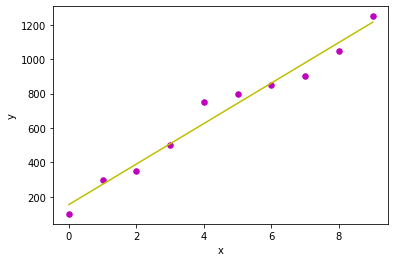

In [10]:
import numpy as np
import matplotlib.pyplot as plt
def estimation(x, y):
    n = np.size(x)
    m_x, m_y = np.mean(x), np.mean(y)
    ss_xy = np.sum(y*x) - n*m_y*m_x
    ss_xx = np.sum(x*x) - n*m_x*m_x
    b_1 = ss_xy / ss_xx
    b_0 = m_y - b_1*m_x
    return(b_0, b_1)
def ploot(x, y, b):
    plt.scatter(x, y, color = "m", marker = "o", s = 30)
    y_pred = b[0] + b[1]*x
    plt.plot(x, y_pred, color = "y")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
def main():
   x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
   y = np.array([100, 300, 350, 500, 750, 800, 850, 900, 1050, 1250])
   b = estimation(x, y)
   print("Estimated coefficients:\nb_0 = {} \nb_1 = {}".format(b[0], b[1]))
   ploot(x, y, b)
if __name__ == "__main__":
    main()

Coefficients: 
 [955.44001079]
Mean squared error: 3309.16
Variance score: 0.42


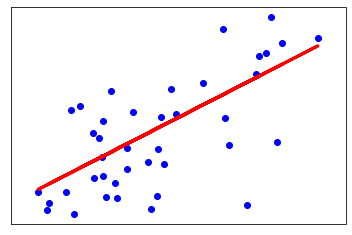

In [29]:
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error,r2_score
diabetes = datasets.load_diabetes()
#print(diabetes)
x= diabetes.data[:, np.newaxis, 2]
x_train=x[:-40]
x_test=x[-40:]
y_train= diabetes.target[:-40]
y_test = diabetes.target[-40:]
#print(len(x_train))
#print(len(x))
#print(len(y_train))
#print(len(x_test))
#print(len(y_test))
obj=linear_model.LinearRegression()
obj.fit(x_train,y_train)
#y_pred=obj.score(x_test,y_test)
y_pred=obj.predict(x_test)
print('Coefficients: \n', obj.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
plt.scatter(x_test, y_test, color = 'blue')
plt.plot(x_test, y_pred, color = 'red', linewidth = 3)
plt.xticks(())
plt.yticks(())
plt.show()

In [40]:
#multiple linear regression
from sklearn.model_selection import train_test_split as t
data=datasets.load_boston()
print(len(data))
x=data.data
y=data.target
print(len(x))
print(len(y))

5
506
506


cofficien 
 [-1.12386867e-01  5.80587074e-02  1.83593559e-02  2.12997760e+00
 -1.95811012e+01  3.09546166e+00  4.45265228e-03 -1.50047624e+00
  3.05358969e-01 -1.11230879e-02 -9.89007562e-01  7.32130017e-03
 -5.44644997e-01]
variance score 0.763417443213846


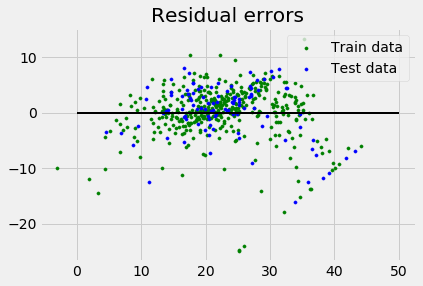

In [65]:
x_train,x_test,y_train,y_test=t(x,y,random_state=1,test_size=.2)
obj=linear_model.LinearRegression()
obj.fit(x_train,y_train)
print('cofficien \n',obj.coef_)
print('variance score {}'.format(obj.score(x_test,y_test)))
plt.scatter(obj.predict(x_train), obj.predict(x_train) - y_train, color = "green", s = 10, label = 'Train data')
plt.scatter(obj.predict(x_test), obj.predict(x_test) - y_test, color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()